\begin{align}
\frac{d [A]}{dt} &= -(k_1 + k_4) [A][G] \\
\frac{d [B]}{dt} &= k_1 [A][G] - (k_2 + k_3)[B][G] \\
\frac{d [C]}{dt} &= k_2 [B][G] \\
\frac{d [D]}{dt} &= k_3 [B][G] \\
\frac{d [F]}{dt} &= k_4 [A][G] \\
\frac{d [G]}{dt} &= (k_1 + k_4) [A][G] - (k_2 + k_3)[B][G]
\end{align}

# Chemistry Department  
### University of North Carolina at Charlotte  
#### Physical Chemistry Laboratory  

## Python Training: Runge-Kutta Modeling  

One of the experiments that will be completed this semester is determining rate constants for a 5-step mechanism of the reaction between 1,4-dichlorobutane with methoxide. This experiment explores the competition of substitution versus elimination processes you learned in organic chemistry with a deeper understanding of the kinetics occurring during elementary steps.

### Experiment 36: Kinetics of Elementary Reactions  
This experiment requires fitting coupled reactions with 5 different parameters. The fitting of nonlinear equations can be challenging, and we have found the Runge-Kutta method (RK4) to be the most practical for this situation. This activity will walk you through an example of using the RK4 model with a snippet of the data that you will collect during Exp. 36.  

![Scheme](scheme.png)
---

## Kinetics Background  
A more detailed explanation of kinetic theory will be provided in Exp. 36. For this activity, we will focus on just two mechanisms: Steps 2 and 3, which involve the intermediate \( B \) forming two different products.  

From the reaction mechanisms shown in **Scheme 1**, these steps have two different rate constants, $ k_2 $ and $ k_3 $, for each respective step, depending on the concentration of $ B $.  

---


## Runge-Kutta Background  

A description of the Runge-Kutta method can be found in most numerical methods textbooks [1]. Here, we present the equations for the 4th-order solution of a system of two first-order differential equations, which can be extended to three or more equations [2]. The solutions will be calculated as discrete values representing the concentration of two species, $ C_1 $ and $C_2 $, as a function of time.  

We denote the rate of change of concentrations as follows:  

$$
\frac{dC_1}{dt} = f(C_1, C_2, t)
$$

$$
\frac{dC_2}{dt} = g(C_1, C_2, t)
$$

where the specific forms of $ f $ and $ g $ are determined by the rate law governing the concentrations $ C_1 $ and $ C_2 $.  

The RK4 algorithm allows us to predict concentrations at future times using an iterative process. Given an initial set of concentrations and rate laws, the RK4 algorithm computes updates using intermediate steps:  

$$
C_1^{(n+1)} = C_1^{(n)} + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$

$$
C_2^{(n+1)} = C_2^{(n)} + \frac{h}{6} (l_1 + 2l_2 + 2l_3 + l_4)
$$

where  

$$
k_1 = f(C_1^{(n)}, C_2^{(n)}, t_n)
$$

$$
l_1 = g(C_1^{(n)}, C_2^{(n)}, t_n)
$$

$$
k_2 = f(C_1^{(n)} + \frac{h}{2} k_1, C_2^{(n)} + \frac{h}{2} l_1, t_n + \frac{h}{2})
$$

$$
l_2 = g(C_1^{(n)} + \frac{h}{2} k_1, C_2^{(n)} + \frac{h}{2} l_1, t_n + \frac{h}{2})
$$

$$
k_3 = f(C_1^{(n)} + \frac{h}{2} k_2, C_2^{(n)} + \frac{h}{2} l_2, t_n + \frac{h}{2})
$$

$$
l_3 = g(C_1^{(n)} + \frac{h}{2} k_2, C_2^{(n)} + \frac{h}{2} l_2, t_n + \frac{h}{2})
$$

$$
k_4 = f(C_1^{(n)} + h k_3, C_2^{(n)} + h l_3, t_n + h)
$$

$$
l_4 = g(C_1^{(n)} + h k_3, C_2^{(n)} + h l_3, t_n + h)
$$

This process is repeated iteratively to simulate reaction progress over time.

---

## Implementation in Jupyter Notebook  

In the RK4 Jupyter notebook, we will start by uploading example data, and you will create a template for RK4 fitting.  

---

## References  

1. Numerical Methods for Ordinary Differential Systems, Lambert, J. D., John Wiley & Sons, New York, 1991.  
2. Tay, Kim Gaik, Kek, Sie Long, Abdul-Kahar, Rosmila, *A Spreadsheet Solution of a System of Ordinary Differential Equations Using the Fourth-Order Runge-Kutta Method*, Spreadsheets in Education (eJSiE): Vol. 5, Iss. 2, Article 5. Available at [this link](http://epublications.bond.edu.au/ejsie/vol5/iss2/5).  
3. Chemical Kinetics, Michael J. Pilling and Paul W. Seakins, Oxford University Press, New York, 1995.  


Please refer to [this document](https://docs.google.com/document/d/1rkcN_XSpFbXRh5uIgxCLAod3hOporAhUSpfrLJwkkUs/edit?usp=sharing) for more information!



In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib import pyplot as plt


class Kinetics:
    def __init__(self, filename):
        self.rates = np.zeros(4)
        self.concentrations = np.zeros(6)
        sheet_name = 'Sheet1'  # Replace with the correct sheet name
        rate_column = ["K1","K2","K3","K4"]  # Replace with your rate constant column
        conc_column = ["t", "[A]", "[B]", "[C]", "[D]", "[F]", "[G]"]  # Replace with your concentration column
        rates, concentrations = self.read_rate_data(filename, sheet_name, rate_column, conc_column)
        #self.initialize_concentrations_vs_time()
        
        
    def initialize_concentrations(self):
        """ intitalize or re-initialize the concentrations """
        self.concentrations[0] = self.A_initial
        self.concentrations[1] = self.B_initial
        self.concentrations[2] = self.C_initial
        self.concentrations[3] = self.D_initial
        self.concentrations[4] = self.F_initial
        self.concentrations[5] = self.G_initial
        
    def initialize_concentrations_vs_time(self):
        """ 
        A method to initialize or re-initialize the concentrations vs time
        """
        self.A_of_t = [self.A_initial]
        self.B_of_t = [self.B_initial]
        self.C_of_t = [self.C_initial]
        self.D_of_t = [self.D_initial]
        self.F_of_t = [self.F_initial]
        self.G_of_t = [self.G_initial]
        



    def update_concentration_vs_time(self):
        """
        A method to append the respective concentrations to the species_of_t lists
        """
        self.A_of_t.append(self.concentrations[0])
        self.B_of_t.append(self.concentrations[1])
        self.C_of_t.append(self.concentrations[2])
        self.D_of_t.append(self.concentrations[3])
        self.F_of_t.append(self.concentrations[4])
        self.G_of_t.append(self.concentrations[5])

    def read_rate_data(self, filepath, sheet_name, rate_column, conc_column):
        """
        Reads rate constants and concentrations from an Excel spreadsheet.

        Args:
            filepath: Path to the Excel file.
            sheet_name: Name of the sheet containing the data.
            rate_column: Name of the column containing rate constants.
            conc_column: Name of the column containing concentrations.

        Returns:
            A tuple containing two pandas Series: rates and concentrations.
            Returns None if an error occurs.
        """
        try:
            df = pd.read_excel(filepath, sheet_name=sheet_name)
            rates = df[rate_column]
            concentrations = df[conc_column]
            
            # get times
            self.time = np.array(concentrations.iloc[:,0])
            self.A_initial = concentrations.iloc[0,1]
            self.expected_A = concentrations.iloc[:,1]
            self.B_initial = concentrations.iloc[0,2]
            self.expected_B = concentrations.iloc[:,2]
            self.C_initial = concentrations.iloc[0,3]
            self.expected_C = concentrations.iloc[:,3]
            self.D_initial = concentrations.iloc[0,4]
            self.expected_D = concentrations.iloc[:,4]
            self.F_initial = concentrations.iloc[0,5]
            self.expected_F = concentrations.iloc[:,5]
            self.G_initial = concentrations.iloc[0,6]
            self.expected_G = concentrations.iloc[:,6]
            
            self.rates[0] = rates.iloc[0,0]
            self.rates[1] = rates.iloc[0,1]
            self.rates[2] = rates.iloc[0,2]
            self.rates[3] = rates.iloc[0,3]
            self.rates[0] = 0.15
            self.rates[1] = 0.005
            self.rates[2] = 0.005
            self.rates[3] = 0.013888888888888888

            #optimal k1 is 0.12, k2 is 0.008, k3 is 0.005, k4 is 0.013888888888888888, MSE is 3.129691796849952e-05, Gradient is
            
            #self.update_concentration_vs_time()
            
            return rates, concentrations
        except FileNotFoundError:
            print(f"Error: File '{filepath}' not found.")
            return None
        except KeyError as e:
            print(f"Error: Column '{e}' not found in the Excel file.")
            return None
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
            return None

    def rate_law_species_A(self):
        """A method to return the rate of change of species A using rate law
           \frac{d [A]}{dt} = -(k_1 + k_4) [A][G]
        """
        A_dot = -(self.rates[0] + self.rates[3]) * self.concentrations[0] * self.concentrations[5]
        #print(F'A_dot is {A_dot}')
        self.A_dot = A_dot
        return A_dot

    def rate_law_species_B(self):
        """A function to return the rate of change of species B."""
        B_dot = self.rates[0] * self.concentrations[0] * self.concentrations[5] - (self.rates[1] + self.rates[2]) * self.concentrations[1] * self.concentrations[5]
        self.B_dot = B_dot
        return B_dot

    def rate_law_species_C(self):
        """A function to return the rate of change of species C."""
        C_dot = self.rates[1] * self.concentrations[1] * self.concentrations[5]
        self.C_dot = C_dot
        return C_dot

    def rate_law_species_D(self):
        """A function to return the rate of change of species D."""
        D_dot = self.rates[2] * self.concentrations[1] * self.concentrations[5]
        self.D_dot = D_dot
        return D_dot

    def rate_law_species_F(self):
        """A function to return the rate of change of species F."""
        F_dot = self.rates[3] * self.concentrations[0] * self.concentrations[5]
        self.F_dot = F_dot
        return F_dot

    def rate_law_species_G(self):
        """A function to return the rate of change of species G."""
        G_dot = -(self.rates[0] + self.rates[3]) * self.concentrations[0] * self.concentrations[5] - (self.rates[1] + self.rates[2]) * self.concentrations[1] * self.concentrations[5]
        self.G_dot = G_dot
        return G_dot
    
    def rk4(self, correct_rk4=False):
        """ Implements the 4th-order Runge-Kutta method to update the concentration of all species """

        # get current concentrations
        A_i = self.concentrations[0]
        B_i = self.concentrations[1]
        C_i = self.concentrations[2]
        D_i = self.concentrations[3]
        F_i = self.concentrations[4]
        G_i = self.concentrations[5]
        

        A_1 = self.rate_law_species_A() 
        B_1 = self.rate_law_species_B()
        C_1 = self.rate_law_species_C() 
        D_1 = self.rate_law_species_D() 
        F_1 = self.rate_law_species_F() 
        G_1 = self.rate_law_species_G() 

        # update the concentrations using half of first update
        self.concentrations[0] = A_i + self.h * A_1 / 2
        self.concentrations[1] = B_i + self.h * B_1 / 2
        self.concentrations[2] = C_i + self.h * C_1 / 2
        self.concentrations[3] = D_i + self.h * D_1 / 2
        self.concentrations[4] = F_i + self.h * F_1 / 2
        self.concentrations[5] = G_i + self.h * G_1 / 2
        

        A_2 = self.rate_law_species_A()
        B_2 = self.rate_law_species_B()
        C_2 = self.rate_law_species_C() 
        D_2 = self.rate_law_species_D()
        F_2 = self.rate_law_species_F()
        G_2 = self.rate_law_species_G() 

        # update the concentrations using half second update
        self.concentrations[0] = A_i + self.h * A_2 / 2
        self.concentrations[1] = B_i + self.h * B_2 / 2
        self.concentrations[2] = C_i + self.h * C_2 / 2
        self.concentrations[3] = D_i + self.h * D_2 / 2
        self.concentrations[4] = F_i + self.h * F_2 / 2
        self.concentrations[5] = G_i + self.h * G_2 / 2
        
        A_3 = self.rate_law_species_A() 
        B_3 = self.rate_law_species_B() 
        C_3 = self.rate_law_species_C() 
        D_3 = self.rate_law_species_D() 
        F_3 = self.rate_law_species_F() 
        G_3 = self.rate_law_species_G() 

        # update the concentrations using the third update
        self.concentrations[0] = A_i + self.h * A_3
        self.concentrations[1] = B_i + self.h * B_3
        self.concentrations[2] = C_i + self.h * C_3
        self.concentrations[3] = D_i + self.h * D_3
        self.concentrations[4] = F_i + self.h * F_3
        self.concentrations[5] = G_i + self.h * G_3

        A_4 = self.rate_law_species_A() 
        B_4 = self.rate_law_species_B() 
        C_4 = self.rate_law_species_C() 
        D_4 = self.rate_law_species_D() 
        F_4 = self.rate_law_species_F() 
        G_4 = self.rate_law_species_G() 

            # get update to concentrations
        self.concentrations[0] = A_i + (A_1 + 2 * A_2 + 2 * A_3 + A_4) * self.h / 6
        self.concentrations[1] = B_i + (B_1 + 2 * B_2 + 2 * B_3 + B_4) * self.h / 6
        self.concentrations[2] = C_i + (C_1 + 2 * C_2 + 2 * C_3 + C_4) * self.h / 6
        self.concentrations[3] = D_i + (D_1 + 2 * D_2 + 2 * D_3 + D_4) * self.h / 6
        self.concentrations[4] = F_i + (F_1 + 2 * F_2 + 2 * F_3 + F_4) * self.h / 6
        self.concentrations[5] = G_i + (G_1 + 2 * G_2 + 2 * G_3 + G_4) * self.h / 6

        # store current concentrations in the concentrations_vs_time lists
        self.update_concentration_vs_time()

    def compute_concentrations_vs_time(self):
        self.initialize_concentrations()
        self.initialize_concentrations_vs_time()
        for i in range(len(self.time)-1):
            t_i = t_kin.time[i]
            t_ip1 = t_kin.time[i+1]
            t_kin.h = t_ip1 - t_i
            t_kin.rk4()
            
    def compute_mean_squared_error(self):
        """ Method to compute the mean squared error of the concentrations vs time
        """
        # compute the squared error of each trajectory
        sq_error_A = (self.A_of_t - self.expected_A) ** 2
        sq_error_B = (self.B_of_t - self.expected_B) ** 2
        sq_error_C = (self.C_of_t - self.expected_C) ** 2
        sq_error_D = (self.D_of_t - self.expected_D) ** 2
        sq_error_F = (self.F_of_t - self.expected_F) ** 2
        sq_error_G = (self.G_of_t - self.expected_G) ** 2
        
        # compute the mean squared error of each trajectory
        self.mseA = np.mean(sq_error_A)
        self.mseB = np.mean(sq_error_B)
        self.mseC = np.mean(sq_error_C)
        self.mseD = np.mean(sq_error_D)
        self.mseF = np.mean(sq_error_F)
        self.mseG = np.mean(sq_error_G)
        
        mse = self.mseA + self.mseB + self.mseC + self.mseD + self.mseF + self.mseG
        self.mse = mse
        return mse
        
        
    def compute_k_gradient(self, delta_k_scale = 0.01):
        """ Method to compute the gradient of the MSE with respect to each value of the k vector
        """
        
        # store the current rates
        _current_rates = np.copy(self.rates)
        
        # build the _delta_k vector
        _delta_k = _current_rates * delta_k_scale
        
        # initialize gradient
        _gradient = np.zeros_like(self.rates)
        
        # loop over the different k entries, perturb, compute error wrt each perturbation
        for i in range(len(self.rates)):
            
            # set step size for current rate
            _h = _delta_k[i]
            
            # do forward update of rate
            self.rates[i] = _current_rates[i] + _h
            
            # run trajectories
            self.compute_concentrations_vs_time()
            
            # compute error
            mse_f = self.compute_mean_squared_error()
            
            #do backward update of rate
            self.rates[i] = _current_rates[i] - _h
            
            # run trajectories
            self.compute_concentrations_vs_time()
            
            # compute_error 
            mse_b = self.compute_mean_squared_error()
            
            # compute current gradient
            _gradient[i] = (mse_f - mse_b) / (2 * _h)
            
            # return to current rate
            self.rates[i] = _current_rates[i]
            
        self.gradient = np.copy(_gradient)   
        return _gradient
    

            
            
        
        
class InteractiveKinetics(Kinetics):
    def __init__(self, filename):
        super().__init__(filename)
        self.rate_sliders = []
        self.create_sliders()
        print(F'Just read the rates and they are {self.rates}')

    def create_sliders(self):
        
        for i, rate in enumerate(self.rates):
            if i==0:
                print("rate is ",rate)
                slider = widgets.FloatSlider(
                    value=rate,
                    min=0.1,
                    max=0.2,
                    step=0.01,
                    description=f'k{i+1}:',
                    readout_format='.4f',
                    continuous_update=False  # Update only when the slider is released
                )
                slider.observe(self.on_rate_change, names='value')
                self.rate_sliders.append(slider)
            elif i==1:
                print("rate is ",rate)
                slider = widgets.FloatSlider(
                    value=rate,
                    min=0.001,
                    max=0.010,
                    step=0.001,
                    description=f'k{i+1}:',
                    readout_format='.4f',
                    continuous_update=False  # Update only when the slider is released
                )
                slider.observe(self.on_rate_change, names='value')
                self.rate_sliders.append(slider)

        display(*self.rate_sliders)
        
    def plot(self):
        plt.plot(t_kin.time, t_kin.A_of_t, color="red", label="[A]")
        plt.plot(t_kin.time, t_kin.expected_A, color="red", marker='o', linestyle="none", label="expected [A]" )
        plt.plot(t_kin.time, t_kin.B_of_t, color="blue", label="[B]")
        plt.plot(t_kin.time, t_kin.expected_B, color="blue", marker='o', linestyle="none", label="expected [B]" )
        plt.plot(t_kin.time, t_kin.C_of_t, color="green", label="[C]")
        plt.plot(t_kin.time, t_kin.expected_C, color="green", marker='o', linestyle="none", label="expected [C]" )
        plt.legend()
        plt.show()  # Display all sliders

    def on_rate_change(self, change):
        # Update the self.rates list with the new values from the sliders.
        for i, slider in enumerate(self.rate_sliders):
            self.rates[i] = slider.value
            
        # Example of how to use the updated rates (you might want to re-run your simulation)
        print("Rates updated:", self.rates)
        self.compute_concentrations_vs_time()
        self.compute_mean_squared_error()
        print(F"Mean Squared Error of fit is {self.mse}")
        #self.compute_k_gradient()
        #norm_grad = np.linalg.norm(self.gradient)
        #plt.plot(t_kin.time, t_kin.A_of_t, color="red", label="[A]")
        #plt.plot(t_kin.time, t_kin.expected_A, color="red", marker='o', linestyle="none", label="expected [A]" )
        #plt.plot(t_kin.time, t_kin.B_of_t, color="blue", label="[B]")
        #plt.plot(t_kin.time, t_kin.expected_B, color="blue", marker='o', linestyle="none", label="expected [B]" )
        #plt.plot(t_kin.time, t_kin.C_of_t, color="green", label="[C]")
        #plt.plot(t_kin.time, t_kin.expected_C, color="green", marker='o', linestyle="none", label="expected [C]" )
        #plt.plot(t_kin.time, t_kin.D_of_t, label="[D]")
        #plt.plot(t_kin.time, t_kin.F_of_t, label="[F]")
        #plt.plot(t_kin.time, t_kin.G_of_t, label="[G]")
        #plt.legend()
        #plt.show()
        
        if self.mse < 1e-4:
            print("Fit is good!  Plot your data in a new cell to see the fit")
            print("To plot, type the code `t_kin.plot()` in a new cell")
        elif self.mse < 1e-3:
            print("Fit is ok, make small adjustments to rate constants")
            
        else:
            print("Fit is really bad, rate constants need to be adjusted")
        # Example: Call a method to rerun the simulation
        # self.run_simulation()


        
        
    
        





In [ ]:
filepath = 'kinetics_data.xlsx'  # Replace with your actual file path
t_kin = InteractiveKinetics(filepath)



rate is  0.15
rate is  0.005


FloatSlider(value=0.15, continuous_update=False, description='k1:', max=0.2, min=0.1, readout_format='.4f', st…

FloatSlider(value=0.005, continuous_update=False, description='k2:', max=0.01, min=0.001, readout_format='.4f'…

Just read the rates and they are [0.15       0.005      0.005      0.01388889]


Rates updated: [0.14       0.005      0.005      0.01388889]
Mean Squared Error of fit is 0.002277941280808727
Fit is really bad, rate constants need to be adjusted
Rates updated: [0.13       0.005      0.005      0.01388889]
Mean Squared Error of fit is 0.0022827773892283502
Fit is really bad, rate constants need to be adjusted


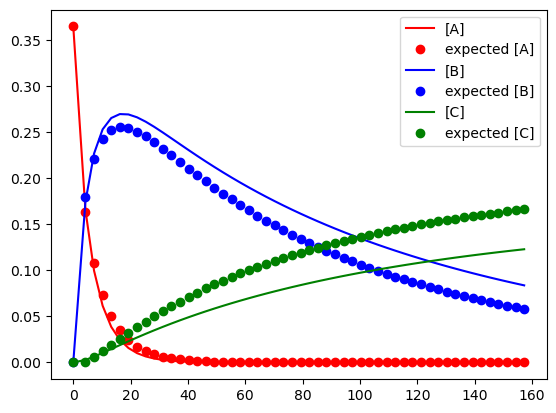

In [3]:
t_kin.plot()